(sec-machine-learning-intro)=
# 机器学习

机器学习指让计算机学习已有数据中的统计规律，并用来预测未知数据。机器学习项目总共分两个阶段：训练（Training）和推理（Inference）。计算机学习已有数据的过程被称为训练阶段，预测未知数据的过程被称为推理阶段。

## 机器学习的定义

:::{note}
本书的公式中，变量加粗表示该变量为向量或矩阵。
:::

给定数据集 $D = \lbrace(\boldsymbol{x}_{1}, y_{1}), (\boldsymbol{x}_{2}, y_{2}), ... , (\boldsymbol{x}_{m}, y_{m}) \rbrace$ ，数据集中有 $m$ 个数据对。第 $i$ 条数据为 $(\boldsymbol{x}_{i}, y_{i})$ ，这条数据被称为一组训练样本（Training Example）。在 {numref}`sec-data-science-lifecycle` 的房价例子中，$\boldsymbol{x_{i}}$ 是一个向量，向量中的每个元素是数据科学家构建的特征，比如街区收入、房屋年龄、房间数、卧室数、街区人口等。我们可以基于这些数据，使用某种机器学习模型对其进行建模，学习到数据中的规律，得到一个模型，其中某个给定的数据集 $D$ 为样本（Sample），又被称为训练集（Training Set），$\boldsymbol{x}$ 为特征（Feature），$y$ 为真实值（Label）或者目标值（Target）。

当前，性能较好的机器学习算法主要有以深度学习为代表的神经网络算法和以梯度提升决策树为代表的决策树算法。下面主要介绍深度学习算法的基础。

## 神经网络

简单来说，神经网络是由很多个下面的公式组成。

$$
\begin{aligned}
\boldsymbol{z} &= \boldsymbol{W} \cdot \boldsymbol{x} + \boldsymbol{b} \\
\boldsymbol{a} &= f(\boldsymbol{z})
\end{aligned}
$$

$\boldsymbol{x}$ 是输入，$\boldsymbol{W}$ 是神经网络的参数（Parameter），又被称为权重（Weight）。神经网络的学习的过程，就是不断更新参数 $\boldsymbol{W}$ 的过程，这也是所谓的训练过程。训练好的模型可以用来推理，用来预测未知数据。

$f$ 是激活函数（Activation Function）。$\boldsymbol{W}$ 与 $\boldsymbol{x}$ 相乘仅是一个线性变换，就算很多个乘法叠加起来，仍然是线性变换，或者说没有激活函数的多层网络就退化成了一个单层线性模型。激活函数可以在神经网络中引入了非线性因素，使得多层神经网络理论上可以拟合任何输入数据到输出数据的模式。从模拟生物的神经元的角度，激活函数是为了让有些神经元被激活，有些神经元被抑制。常见的激活函数有 Sigmoid 和 ReLU。

Sigmoid 的公式为：

$$
f(x) = \frac{1}{1+\exp{(-x)}}
$$

ReLU 的公式为：

$$
f(x) = \max (0, x)
$$

将这两个函数可视化，效果如下：

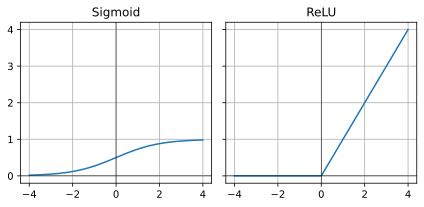

In [34]:
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 2, figsize=(6, 3), sharey=True)

# 创建 x 轴的数据
x = np.linspace(-4, 4, 200)

# 创建 sigmoid 函数的 y 轴数据
sigmoid = 1 / (1 + np.exp(-x))

# 创建 ReLu 函数的 y 轴数据
relu = np.maximum(0, x)

# 在第一个子图上画 sigmoid 函数
axs[0].plot(x, sigmoid)
axs[0].axhline(0, color='black',linewidth=0.5)
axs[0].axvline(0, color='black',linewidth=0.5)
axs[0].grid(True)
axs[0].set_title('Sigmoid')

# 在第二个子图上画 ReLu 函数
axs[1].plot(x, relu)
axs[1].axhline(0, color='black',linewidth=0.5)
axs[1].axvline(0, color='black',linewidth=0.5)
axs[1].grid(True)
axs[1].set_title('ReLU')

plt.yticks([0, 1, 2, 3, 4])
plt.tight_layout()
# 显示图像
plt.show()

## 前向传播


{numref}`fig-forward-pass` 是一种最简单的神经网络：将 $\boldsymbol{z^{[n]}} = \boldsymbol{W^{[n]}} \cdot \boldsymbol{a^{[n-1]}} + \boldsymbol{b^{[n]}}$ 和 $\boldsymbol{a^{[n]}} = f(\boldsymbol{z^{[n]}})$ 堆叠，前一层的输出 $\boldsymbol{a^{[n-1]}}$ 作为下一层的输入。这种网络又被成为前馈神经网络（Feedforward Neural Network），或者多层感知机（Multilayer Perceptron，MLP）。多层网络中，为了区分某一层，用方括号上标来表示，比如 $\boldsymbol{a^{[1]}}$ 是第一层的输出，$\boldsymbol{W^{[1]}}$ 是第一层的参数。

```{figure} ../img/ch-data-science/forward-pass.svg
---
width: 800px
name: fig-forward-pass
---
神经网络的前向传播
```

{numref}`fig-forward-pass` 是神经网络前向传播的过程：假设输入 $\boldsymbol{x}$ 是一个 3 维的向量；{numref}`fig-forward-pass` 中的每个圆圈为向量的一个元素（一个标量值），图中同时也演示了第一层的 $\boldsymbol{a^{[1]}}$ 的向量化计算方式，以及 $z^{[1]}_1$ 的标量化计算方式，实际场景中往往需要使用现代处理器的向量化引擎完成计算。

## 反向传播

神经网络的训练过程就是不断更新各层的 $\boldsymbol{W}$ 和 $\boldsymbol{b}$。

首先以某种随机初始化方式，初始化各层的 $\boldsymbol{W}$ 和 $\boldsymbol{b}$。比如，初始化为正态分布的小数。

然后确定一个损失函数（Loss Function）$L$。损失函数计算了神经网络预测值 $\hat{y}$ 与真实值 $y$ 之间的差距，训练的目标就是让损失函数变小。比如，预测房价的案例，我们使用误差的平方（Squared Error）作为损失函数，某一个样本的损失函数为 $L = (y - \hat{y})^2$。

然后计算损失函数对每层参数的导数。$L$ 关于第 $l$ 层 $\boldsymbol{W^{[l]}}$ 和 $\boldsymbol{b^{[l]}}$ 的导数为 $\frac{\partial L}{\partial \boldsymbol{W^{[l]}}}$ 和 $\frac{\partial L}{\partial \boldsymbol{b^{[l]}}}$，再按照下面的公式更新 $\boldsymbol{W^{[l]}}$ 和 $\boldsymbol{b^{[l]}}$。

$$
\begin{aligned}
\boldsymbol{W^{[l]}} &= \boldsymbol{W^{[l]}}-\alpha\frac{\partial L}{\partial \boldsymbol{W^{[l]}}}\\
\boldsymbol{b^{[l]}} &= \boldsymbol{b^{[l]}}-\alpha\frac{\partial L}{\partial \boldsymbol{b^{[l]}}}\\
\end{aligned}
$$

公式中，$\alpha$ 是学习率，即参数更新的速度，如果学习率太大则容易振荡，不容易收敛，太小则收敛速度又会过慢。

各层的导数又被称为梯度，参数沿着梯度方向下降，又被成为梯度下降法。计算各层的导数时，往往是从最后的损失函数开始，向前一层一层地求梯度，即先求最后第 $n$ 层的梯度，得到第 $n$ 层的梯度，结合链式法则，求第 $n-1$ 层的梯度。{numref}`fig-back-propagation` 展示了神经网络的反向传播过程。

```{figure} ../img/ch-data-science/back-propagation.svg
---
width: 800px
name: fig-back-propagation
---
神经网络的反向传播
```

## 超参数

神经网络训练过程中，有很多训练模型之前需要人为设定的一些参数，这些参数不能通过模型的反向传播算法来自动学习，而需要手动选择和调整。这些参数又被成为超参数，超参数的选择通常基于经验或反复试验。以下是一些超参数：

* 学习率，即刚才提到的 $\alpha$，控制着每次更新参数的步长。
* 网络结构：模型的层数、每层的神经元数量、激活函数的选择等。不同的网络结构对于不同的任务可能有不同的性能表现。

## 实现细节

神经网络训练实现起来要关注以下三个步骤：

* 一次前向传播
* 一次反向传播
* 一次更新模型权重

{numref}`fig-model-training-input-output` 整理了神经网络的第 i 层进行训练时，以上三个步骤的输入和输出。

```{figure} ../img/ch-data-science/model-training-input-output.svg
---
width: 800px
name: fig-model-training-input-output
---
前向传播、反向传播和更新模型权重的输入和输出
```

对于前向传播，输入有两部分：i-1 层输出 $\boldsymbol{a^{[i-1]}}$ 和第 i 层的模型权重 $\boldsymbol{W^{[i]}}$、$\boldsymbol{b^{[i]}}$；输出又被称为激活（Activation）。

对于反向传播，输入有三部分：i 层输出 $\boldsymbol{a^{[i]}}$；第 i 层的模型权重 $\boldsymbol{W^{[i]}}$、$\boldsymbol{b^{[i]}}$；损失对 i 层输出的导数 $\boldsymbol{\boldsymbol{\frac{\partial L}{a^{[i]}}}}$。根据链式法则，可以求出损失对 i 层模型权重的导数 $\boldsymbol{\frac{\partial L}{\partial W^{[i]}
}}$、$\boldsymbol{\frac{\partial L}{\partial b^{[i]}
}}$，也就是梯度。

得到梯度后，需要沿着梯度下降的方向更新模型权重。如果是最简单的梯度下降法，优化器直接在模型原有权重基础上做减法，不需要额外保存状态，比如：$\boldsymbol{W^{[l]}} = \boldsymbol{W^{[l]}}-\alpha\frac{\partial L}{\partial \boldsymbol{W^{[l]}}}$

复杂一点的优化器，比如 Adam， 在梯度下降时引入了动量的概念。动量是梯度的指数移动平均，需要维护一个梯度的移动平均矩阵，这个矩阵就是优化器的状态。因此，优化器状态、原来的模型权重和梯度共同作为输入，可以得到更新后的模型权重。至此才能完成一轮模型的训练。

如果只考虑前向传播和反向传播，对于一个神经网络，其训练过程如 {numref}`fig-model-training` 所示。{numref}`fig-model-training` 演示了 3 层神经网络，前向过程用 FWD 表示，反向过程用 BWD 表示。

```{figure} ../img/ch-data-science/model-training.svg
---
width: 800px
name: fig-model-training
---
前向传播（图中用 FWD 表示）和反向传播（图中用 BWD 表示）
```

## 推理

模型训练就是前向和反向传播，模型推理只需要前向传播，只不过输入层换成了需要预测的 $\boldsymbol{x}$。